In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_0 = [21,54,80,51,66,80,24,61,12,52]
x_1 = [84,95,50,28,66,92,51,98,20,12]
y = [0,1,1,0,1,1,0,1,0,0]

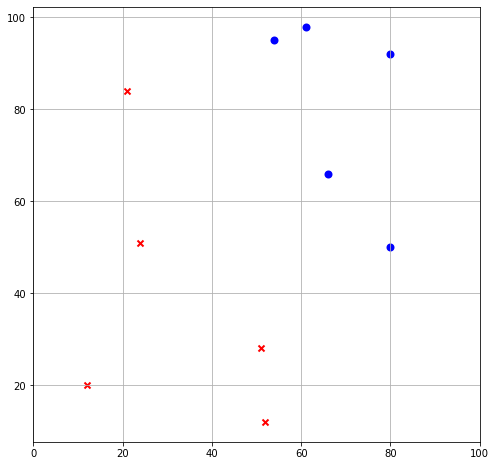

In [3]:
x_0_fail = []
x_1_fail = []
x_0_pass = []
x_1_pass = []

for i in range(10):
    if y[i] == 0:
        x_0_fail.append(x_0[i])
        x_1_fail.append(x_1[i])
    if y[i] == 1:
        x_0_pass.append(x_0[i])
        x_1_pass.append(x_1[i])
        
plt.figure(figsize = (8,8))
plt.scatter(x_0_fail,x_1_fail, c='r',marker='x', linewidths=2)
plt.scatter(x_0_pass,x_1_pass,c='b',marker='o',linewidths=2)
plt.xlim(0, 100)
plt.grid(True)
plt.show()

In [4]:
X = np.array([x_0,x_1])
X = X.T
X = np.c_[X, np.ones(10)]

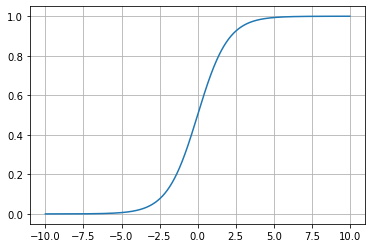

In [5]:
def logistic(x):
    log_x = 1/(1+np.exp(-x))
    return log_x

t = np.linspace(-10,10,1000)
plt.plot(t,logistic(t))
plt.grid(True)

In [6]:
def numerucal_gradient(f,W,X,y):
    h = 1e-4
    grad = np.zeros_like(W)
    for idx in range(W.size):
        tmp_val = W[idx]

        W[idx] = tmp_val+h
        fxh1 = f(W,X,y)

        W[idx] = tmp_val-h
        fxh2 = f(W,X,y)    

        grad[idx] = (fxh1-fxh2)/(2*h)
        W[idx] = tmp_val
    return grad

In [7]:
def fucntion_MSE(W,X,y):
    mse = np.zeros(len(X))
    for idx in range(len(X)):
        mse[idx] = (np.dot(W.T,X[idx])-y[idx])**2
    mse = np.sum(mse)/len(X)
    return mse

In [8]:
### sample data set ###
GD_W = np.zeros((3,1))
GD_W[0] = 2
GD_W[1] = 2.5
GD_W[2] = -6

In [9]:
num_epoch=500
eta = 0.00001

GD_0 = np.zeros((num_epoch,1))
GD_1 = np.zeros((num_epoch,1))
GD_2 = np.zeros((num_epoch,1))

z = np.zeros((10,1))
y_hat = np.zeros((10,1))
acc_count = np.zeros((num_epoch,1))
E_cee = np.zeros((num_epoch,1))

for epoch in range(num_epoch):
    mse = fucntion_MSE(GD_W, X, y)
    if mse < 0.00001:
        print('GD를 종료합니다.')
        break
    GD_W = GD_W - eta*numerucal_gradient(fucntion_MSE,GD_W,X,y)
    
    GD_0[epoch]=GD_W[0]
    GD_1[epoch]=GD_W[1]
    GD_2[epoch]=GD_W[2]

    for j in range(10):
        z[j] = x_0[j]*GD_W[0]+x_1[j]*GD_W[1]+GD_W[2]
    p_n = logistic(z)

    for k in range(10):
        if p_n[k]>=0.5:
            y_hat[k] = 1
        else:
            y_hat[k] = 0
            
    acc = 0
    for l in range(10):
        if y[l]==y_hat[l]:
            acc = acc+(1/10)
    acc_count[epoch] = acc
    
    sum_ = 0
    for m in range(10):
        sum_ = sum_ + y[m]*np.log(p_n[m])+((1-y[m])*np.log(1-p_n[k]))
    E_cee[epoch] = -(1/10)*sum_

/Users/isangcheol/opt/anaconda3/envs/sangchu/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in log
/Users/isangcheol/opt/anaconda3/envs/sangchu/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in multiply


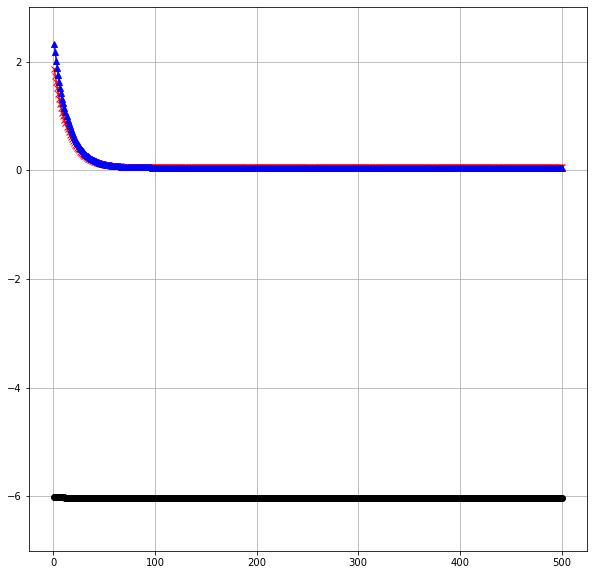

In [10]:
space = np.linspace(1,500,500)
plt.figure(figsize = (10,10))
plt.plot(space,GD_0,'r-x')
plt.plot(space,GD_1, 'b-^')
plt.plot(space,GD_2, 'k-o')
plt.ylim(-7, 3)
plt.grid(True)
plt.show()

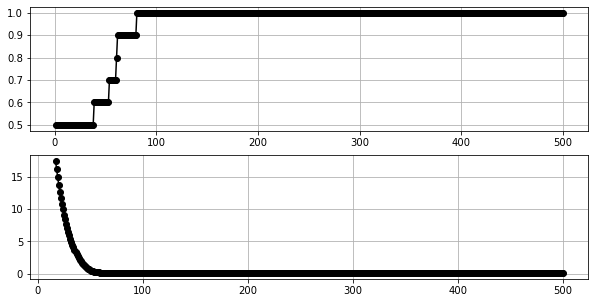

In [11]:
plt.figure(figsize = (10,5))
plt.subplot(2,1,1)
plt.plot(space,acc_count,'k-o')
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(space,E_cee,'k-o')
plt.grid(True)

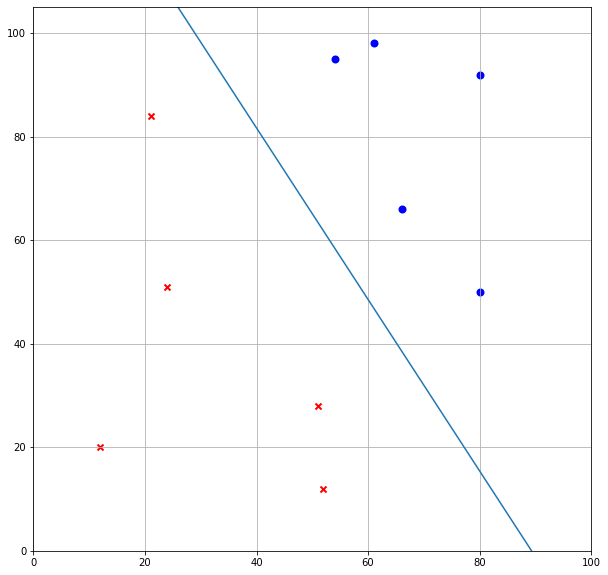

In [12]:
ATT_rate = np.linspace(1,500,500)
score = -(GD_W[0]/GD_W[1])*ATT_rate-(GD_W[2]/GD_W[1])

plt.figure(figsize = (10,10))
plt.plot(ATT_rate,score)
plt.scatter(x_0_fail,x_1_fail, c='r',marker='x', linewidths=2)
plt.scatter(x_0_pass,x_1_pass,c='b',marker='o',linewidths=2)
plt.ylim(0, 105)
plt.xlim(0, 100)
plt.grid(True)
plt.show()